In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [87]:
#import the csv's

#2019 Data
speaker_file = "Resources/smart_speaker_consumer_adoption_report_2019.csv"

# 2018 shop data
voice_file = "Resources/voice-shopping-consumer-adoption-report-june-2018.csv"

speaker_df = pd.read_csv(speaker_file)
voice_df = pd.read_csv(voice_file)

In [88]:
#what percentage of U.S households own a smart speaker?
voice_df.head()

,shopping_method,own_smartphone,have_tried_a_voice_assistant,own_a_smart_speaker,own_feature_phone,no_mobile_device,shoppers_use_voice,online_apparel,online_everyday_household_items,online_entertainment_music_movies,...,voice_entertainment_music_movies,voice_consumer_electronics,voice_travel,voice_games,voice_groceries,voice_appliances,voice_furniture,voice_prepared_meal_or_drink,voice_none_of_the_above,voice_local_services
0,physical,no,no,no,no,no,no,yes,yes,no,...,no,yes,no,yes,no,no,no,no,no,no
1,physical,yes,no,no,no,no,yes,no,no,yes,...,no,yes,no,no,no,no,no,no,yes,no
2,physical,yes,yes,no,no,yes,no,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no
3,website,yes,yes,no,no,no,no,yes,yes,no,...,yes,no,no,no,no,yes,no,no,no,no
4,physical,yes,yes,no,no,no,no,yes,yes,no,...,no,no,no,no,no,no,no,yes,no,no


In [89]:
#only looking for the 'own_a_smart_speaker' column
#clean it up, give the column a nicer name
answers_df = pd.DataFrame({'Owns a Smart Speaker': voice_df['own_a_smart_speaker']})
answers_df.head()


,Owns a Smart Speaker
0,no
1,no
2,no
3,no
4,no


In [93]:
#set up a groupby
total_survey = len(answers_df['Owns a Smart Speaker'])
total_survey

1203

In [96]:
shop_df = answers_df.groupby(['Owns a Smart Speaker'])
shop_df

In [97]:
results = shop_df['Owns a Smart Speaker'].unique().str[0]
results

Owns a Smart Speaker
no      no
yes    yes
Name: Owns a Smart Speaker, dtype: object

In [99]:
results_df = shop_df['Owns a Smart Speaker'].count()
results_df

Owns a Smart Speaker
no     943
yes    260
Name: Owns a Smart Speaker, dtype: int64

In [102]:
final_answers_df = pd.DataFrame({'Do You Own a Smart Speaker?' : results,
                                 'Total': results_df})
final_answers_df.style.hide_index()

Do You Own a Smart Speaker?,Total
no,943
yes,260


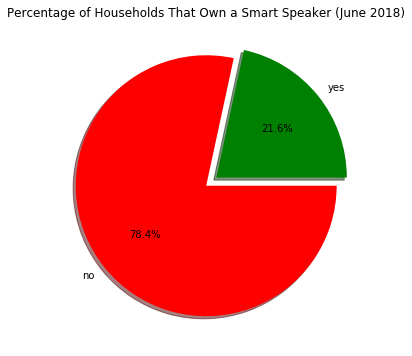

In [113]:
#pie chart is (unfortunately) the best option to display the data here
#values

pie_responses = final_answers_df.sort_values('Total')

#assign values
pie_speaker = pie_responses['Do You Own a Smart Speaker?']
pie_chart_two = pie_responses['Total']
plt.figure(figsize=[10,6])
colors = ['green' , 'red']
explode = (0.1,0)

# set up the pie chart

plt.pie(pie_chart_two, labels = pie_speaker, autopct = '%1.1f%%', colors = colors, shadow = True, explode = explode)

#give title
plt.title('Percentage of Households That Own a Smart Speaker (June 2018)')

# display pie chart
plt.show()













In [40]:
#how do people shop?
#group online vs smart speaker vs other methods

voice_df.groupby('shopping_method')



In [46]:
method_df = pd.DataFrame({'Shopping Method?': voice_df['shopping_method']})
method_df

,Shopping Method?
6,physical
11,mobile_device
15,website
16,website
19,physical
...,...
1178,mobile_device
1179,physical
1185,physical
1191,physical


In [48]:
#find the amount that were surveyed
total_responses = len(method_df['Shopping Method?'])
total_responses

260

In [51]:
prep = method_df.groupby(['Shopping Method?'])
prep

In [56]:
prep_df = prep['Shopping Method?'].unique().str[0]
prep_df

Shopping Method?
mobile_device            mobile_device
none_of_the_above    none_of_the_above
physical                      physical
smart_speaker            smart_speaker
website                        website
Name: Shopping Method?, dtype: object

In [58]:
pie_df = prep['Shopping Method?'].count()
pie_df

Shopping Method?
mobile_device         23
none_of_the_above     11
physical             148
smart_speaker          7
website               71
Name: Shopping Method?, dtype: int64

In [60]:
count_df = pd.DataFrame({'Shopping Method': prep_df,
                         'Total': pie_df})
count_df.style.hide_index()

Shopping Method,Total
mobile_device,23
none_of_the_above,11
physical,148
smart_speaker,7
website,71


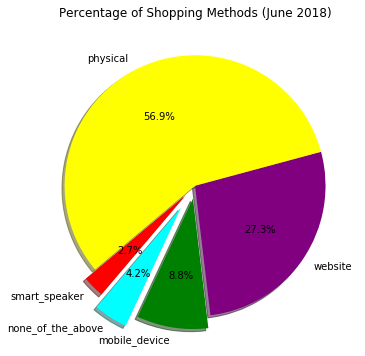

In [76]:
#sort, really only one value (column) here
pie_response = count_df.sort_values('Total')

#assign the variables

pie_var = pie_response['Shopping Method']
pie_chart = pie_response['Total']
plt.figure(figsize=[10,6])
explode = (0.1,0.2,0.1,0,0)
colors = ['red', 'cyan', 'green', 'purple', 'yellow']

#set up the pie graph

plt.pie(pie_chart, labels = pie_var, autopct = '%1.1f%%', colors = colors, shadow = True, startangle = 220, explode = explode)

#title

plt.title("Percentage of Shopping Methods (June 2018)")

# and display the pie chart
plt.show()